# library

In [1]:
import pandas as pd #to read data as dataframe
import numpy as np #for dataframe and list manipulation
import matplotlib.pyplot as plt #for ploting data
from scipy.io import arff #to read Arrf files
import seaborn as sns #just an add on for matplotlib for better color palette
%matplotlib inline 
#to make jupyter notbook showes matplotlib plots and histogram

# Reading arff file in as dataframe

In [2]:
def read_arrf(arrf_file):
    #only take ? as a missing value
    data = arff.loadarff(open(arrf_file))
    return pd.DataFrame(data[0])

# Fill in missing data

In [3]:
def check_m_data(df):
    #to check if any data is missing
    if pd.isnull(df).sum().sum() > 0:
        return True
    else: return False

In [4]:
def fill_in_m_data_with_mean(df):
    #use mean to fill in missing data
    if check_m_data(df):    
        m_data = df.copy()    
        return m_data.fillna(m_data.mean())
    else: return df

In [5]:
def fill_in_m_data_with_mode(df):
    #use median to fill in missing data
    if check_m_data(df):
        m_data = df.copy()
        return m_data.fillna(df.mode().iloc[0])
    else: return df

# Normalizing and standardizing data

# min-max

In [6]:
def Normalizing(df):
    #max-min normalization
    df_min_max_scaled = df.copy()
    for column in df_min_max_scaled.columns:
        try:
            df_min_max_scaled[column] =(df_min_max_scaled[column] - df_min_max_scaled[column].min())/(df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
        except:
            pass
    return df_min_max_scaled

# z-score

In [7]:
def z_score(df):
    #max-min standardizing
    df_z_scaled = df.copy()

    # apply normalization techniques
    for column in df_z_scaled.columns:
        try:
            df_z_scaled[column] = (df_z_scaled[column] -df_z_scaled[column].mean()) / df_z_scaled[column].std()
        except:
            pass
    return df_z_scaled

# boxplot

In [8]:
def box_plot(df):
    #to drow a boxpolt
    dfd = df.describe().loc[['min','max','25%','75%','50%']]
    print(dfd)   
    sns.set_theme(style="whitegrid")    
    ax = sns.boxplot(data=dfd,palette="Set2")

# TESTS

# iris

In [9]:
df = read_arrf('iris.arff')

In [10]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,b'Iris-virginica'
146,6.3,2.5,5.0,1.9,b'Iris-virginica'
147,6.5,3.0,5.2,2.0,b'Iris-virginica'
148,6.2,3.4,5.4,2.3,b'Iris-virginica'


In [11]:
check_m_data(df)

False

     sepallength  sepalwidth  petallength  petalwidth
min          4.3         2.0         1.00         0.1
max          7.9         4.4         6.90         2.5
25%          5.1         2.8         1.60         0.3
75%          6.4         3.3         5.10         1.8
50%          5.8         3.0         4.35         1.3


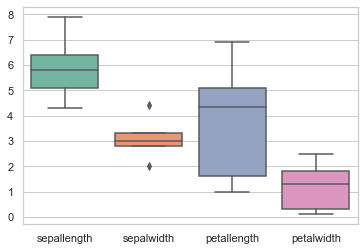

In [12]:
box_plot(df)

# diabetes

In [13]:
df2 = read_arrf('diabetes.arff')

In [14]:
df2

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,NaN,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


In [15]:
df2.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.990482,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.889091,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [16]:
check_m_data(df2)

True

In [17]:
fill_in_m_data_with_mean(df2)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,31.990482,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.300000,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.100000,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.900000,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.800000,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.200000,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.100000,0.349,47.0,b'tested_positive'


In [18]:
fill_in_m_data_with_mode(df2)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,32.0,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,b'tested_negative'
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,b'tested_negative'
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,b'tested_negative'
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,b'tested_positive'


In [19]:
df2 = fill_in_m_data_with_mean(df2)

     preg    plas   pres  skin    insu  mass     pedi   age
min   0.0    0.00    0.0   0.0    0.00   0.0  0.07800  21.0
max  17.0  199.00  122.0  99.0  846.00  67.1  2.42000  81.0
25%   1.0   99.00   62.0   0.0    0.00  27.3  0.24375  24.0
75%   6.0  140.25   80.0  32.0  127.25  36.6  0.62625  41.0
50%   3.0  117.00   72.0  23.0   30.50  32.0  0.37250  29.0


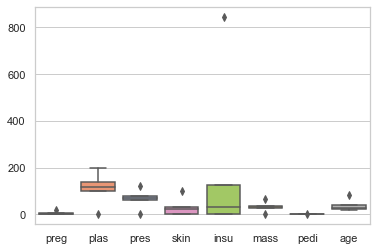

In [20]:
box_plot(df2)

In [21]:
df2 = z_score(df2)

         preg      plas      pres      skin      insu      mass      pedi  \
min -1.141108 -3.781190 -3.570271 -1.287373 -0.692439 -4.057674 -1.188778   
max  3.904034  2.442886  2.732747  4.918660  6.648507  4.453292  5.879733   
25% -0.844335 -0.684790 -0.367098 -1.287373 -0.692439 -0.594941 -0.688520   
75%  0.639530  0.605376  0.562856  0.718617  0.411740  0.584671  0.465923   
50% -0.250789 -0.121808  0.149543  0.154433 -0.427783  0.001207 -0.299933   

          age  
min -1.040871  
max  4.061069  
25% -0.785774  
75%  0.659776  
50% -0.360612  


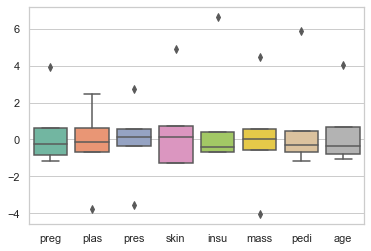

In [22]:
box_plot(df2)